
---


# **Task 3 - Exploratory Data Analysis of Retail Store**

## **AUTHOR - Vishwas Garade**

---


## **IMPORT REQUIRED LIBRARIES**


---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from ipywidgets import interact
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
plt.style.use("dark_background")



---


## **DATA EXPLORATION**


---



In [2]:
sample = pd.read_csv('SampleSuperstore.csv')
sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
sample[['Ship Mode', 'Segment', 'Country', 'City','State', 'Region', 'Category','Sub-Category']].nunique()


Ship Mode         4
Segment           3
Country           1
City            531
State            49
Region            4
Category          3
Sub-Category     17
dtype: int64



---


# **CORRELATION AND COVARIANCE**


---



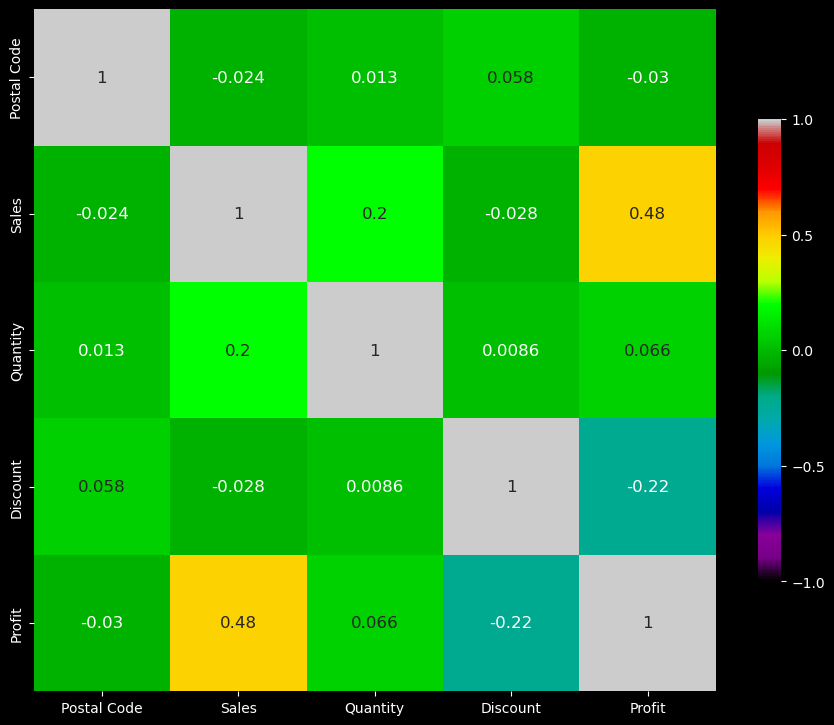

In [5]:
f, ax = plt.subplots(figsize=(11, 15))
heatmap = sns.heatmap(sample.corr(), square = True, cmap = "nipy_spectral", vmin = -1, vmax = 1, cbar_kws = {'shrink': .4, 'ticks' : [-1, -0.5, 0, 0.5, 1]},
                      annot = True, annot_kws = {"size": 12})
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

### Observation from correlation heat map:
* Negative value of correlation between Profit ad Discount indicates that increase in discount will decrease the profit. So, discount plans should be given in such a way that both the company and the customer will be benefited.
* Negative value of correlation between Sales ad Discount indicates that increase in sales results in decrease in Discount.
         

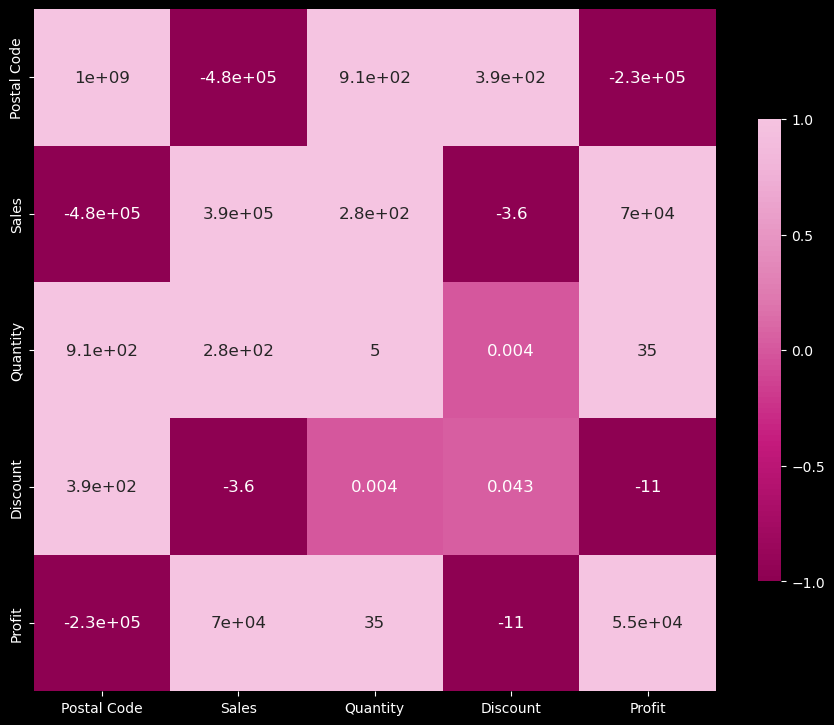

In [6]:
f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(sample.cov(), square = True, cmap = "PiYG", center=2, vmin = -1, vmax = 1, cbar_kws = {'shrink': .4, 'ticks' : [-1, -0.5, 0, 0.5, 1]},
                      annot = True, annot_kws = {"size": 12})
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

### Observation from covariance heat map:
* Negative value of covariance between Profit ad Discount indicates that the variables are inversely related. Such inversely related pair of variables are, 
         (Discount, Profit)
         (Sales, Discount)



---


# **RELATION BETWEEN SALE AND PROFIT**


---



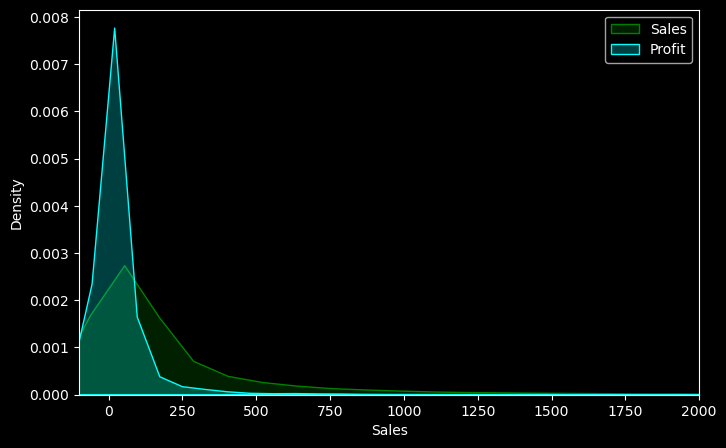

In [7]:
plt.style.use("dark_background")
plt.figure(figsize=(8,5))
sns.kdeplot(sample['Sales'],color='green',label='Sales',shade=True)
sns.kdeplot(sample['Profit'],color='cyan',label='Profit',shade=True)
plt.xlim([-100,2000])
plt.legend()

### Observation from density plot between profit and sales:
* As the peak of Profit occurs way too heigher than the peak of Sales Density of Profit is very high than the sales frequency which is a good sign.

---

# **RELATION BETWEEN PROFIT AND LOSS**


---



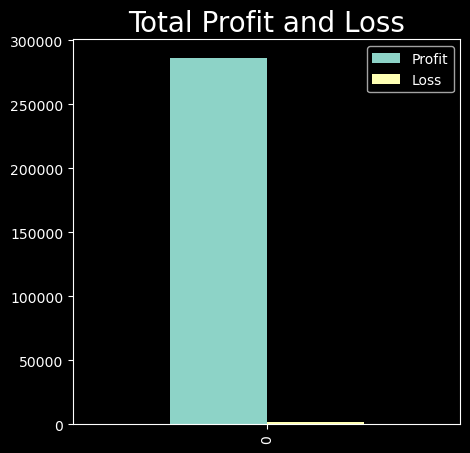

 Profit :  286397.0217
 Loss   :  1871


In [8]:
P = sample['Profit'].sum()
L = (sample['Profit']<0).sum()
plt.style.use("dark_background")

P_L = {'Profit': [P], 'Loss': [L]}
P_L = pd.DataFrame(P_L)
P_L.plot(kind='bar',figsize=(5,5))
plt.title('Total Profit and Loss', fontsize = 20)
plt.show()

print(' Profit : ',P)
print(' Loss   : ',L)



---


# **SALES ANALYSIS**



---



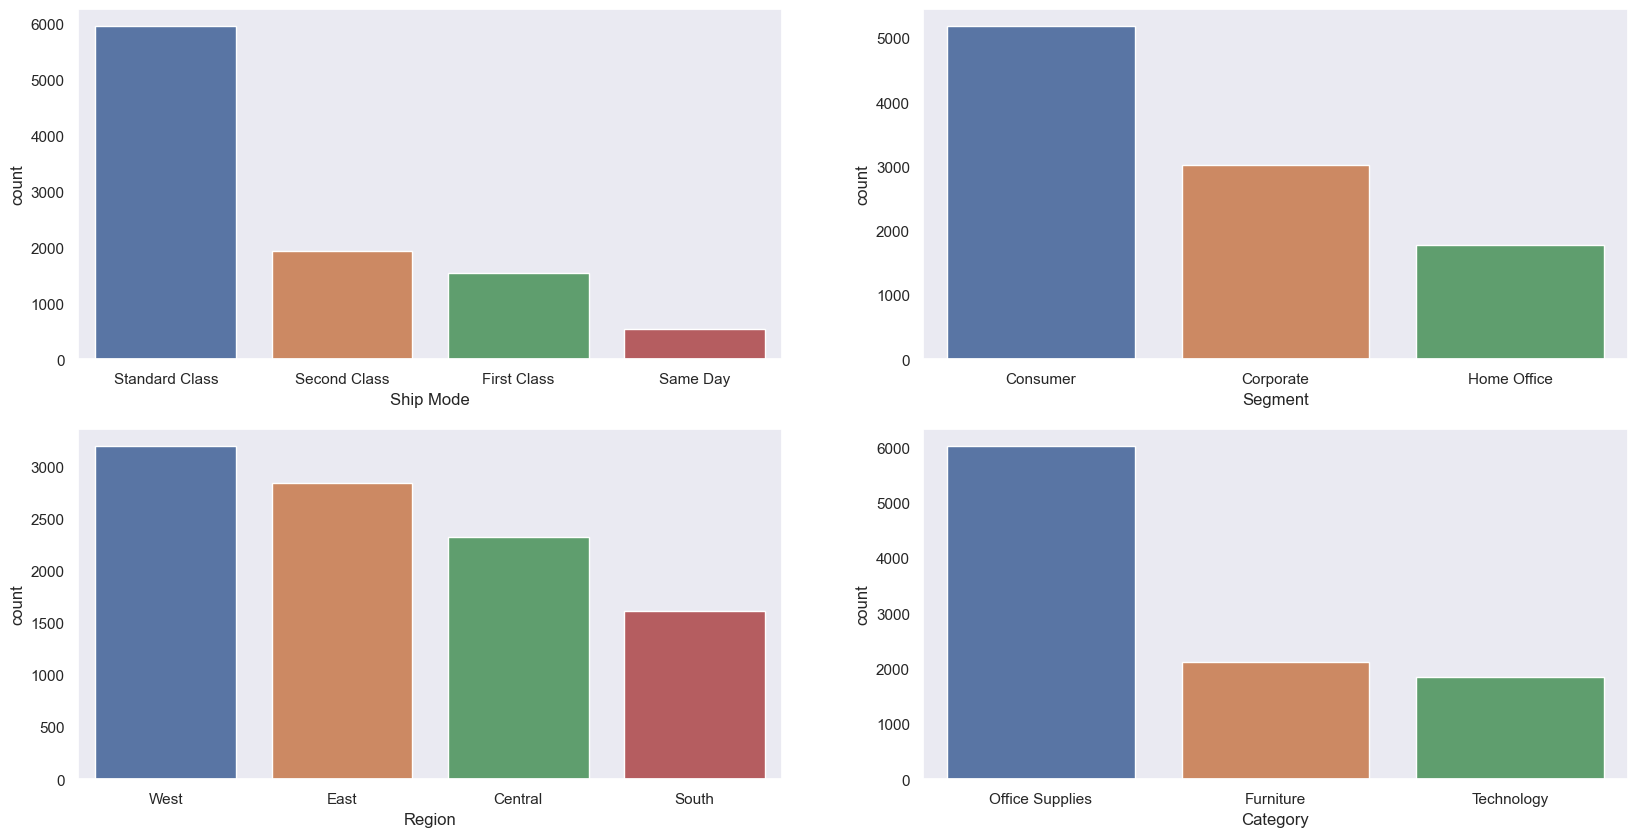

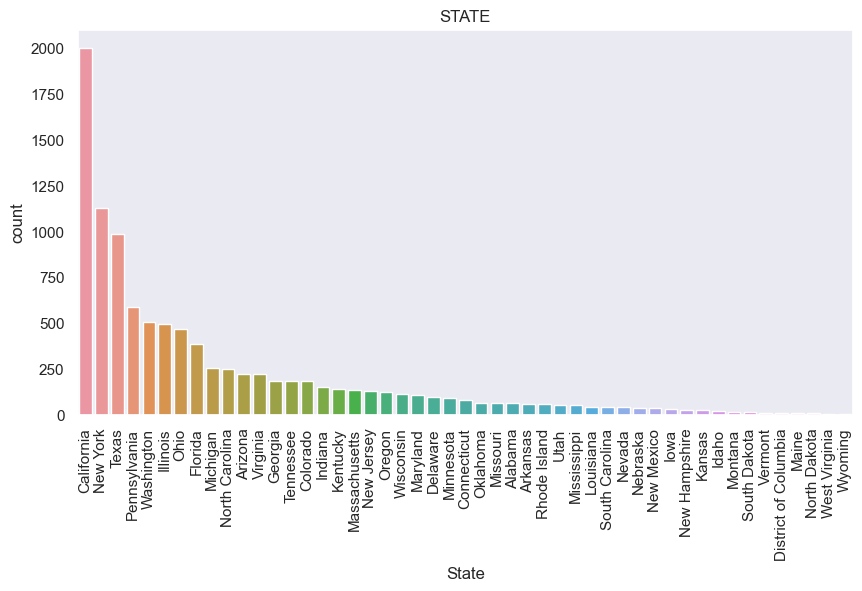

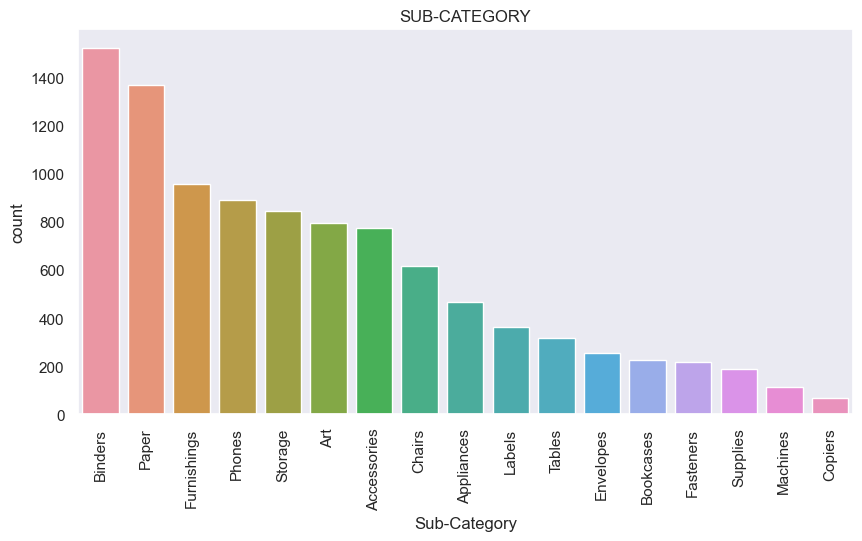

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(20,10)) 
sns.countplot(ax=axes[0, 0], x=sample['Ship Mode'],order = sample['Ship Mode'].value_counts().index)
sns.countplot(ax=axes[0, 1], x=sample['Segment'],order = sample['Segment'].value_counts().index)
sns.countplot(ax=axes[1, 0], x=sample['Region'],order = sample['Region'].value_counts().index)
sns.countplot(ax=axes[1, 1], x=sample['Category'],order = sample['Category'].value_counts().index)

plt.figure(figsize=(10,5))
sns.countplot(x=sample['State'],order = sample['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x=sample['Sub-Category'],order = sample['Sub-Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title("SUB-CATEGORY")
plt.show()


### Observation from sales analysis:
* Among Ship Mode, Standard Class has highest sales count and Same Day has the lowest sales count.
* Among Segment variable, Consumer has highest sales count and Home Office has the lowest sales count.
* Among Region, West has highest sales count and South has the lowest sales count.
* Among Category, Office Supplies has highest sales count and Technology has the lowest sales count.



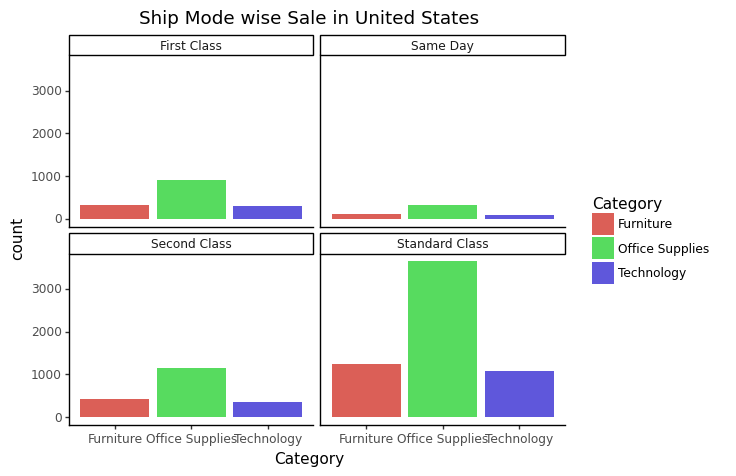

<ggplot: (172587295365)>

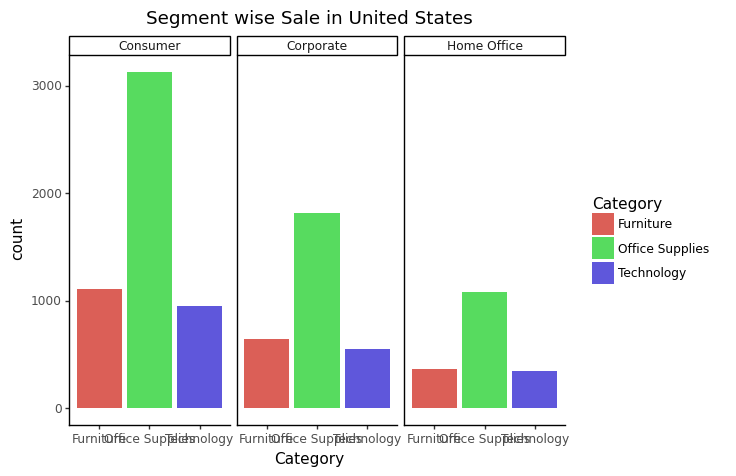

<ggplot: (172587420534)>

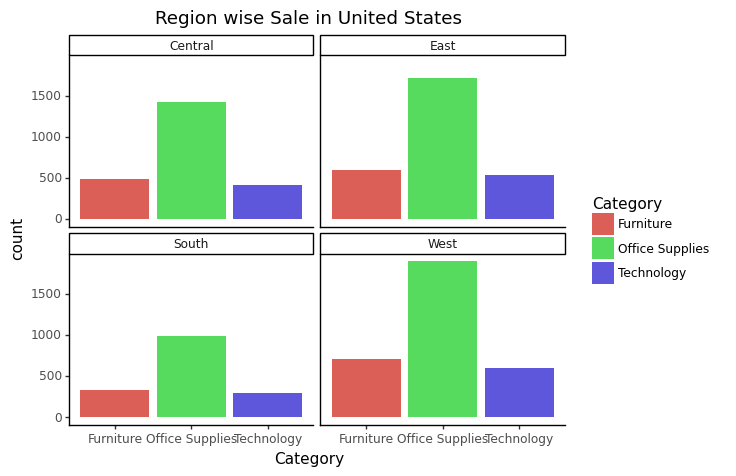

<ggplot: (172587617886)>

In [11]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(5,5),
                     axis_ticks_length_major=5,axis_ticks_length_minor=5)
Shipmode_Wise=(ggplot(sample, aes(x='Category', fill='Category')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Ship Mode']) + flip_xlabels+ ggtitle("Ship Mode wise Sale in United States")) + theme_classic()
display(Shipmode_Wise)

Segment_Wise=(ggplot(sample, aes(x='Category', fill='Category')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Segment']) + flip_xlabels+ ggtitle("Segment wise Sale in United States")) + theme_classic()
display(Segment_Wise)

Region_Wise=(ggplot(sample, aes(x='Category', fill='Category')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Region']) + flip_xlabels+ ggtitle("Region wise Sale in United States")) + theme_classic()
display(Region_Wise)




---


# **PROFIT ANALYSIS**


---



### PROFIT YIELDED IN EACH STATE

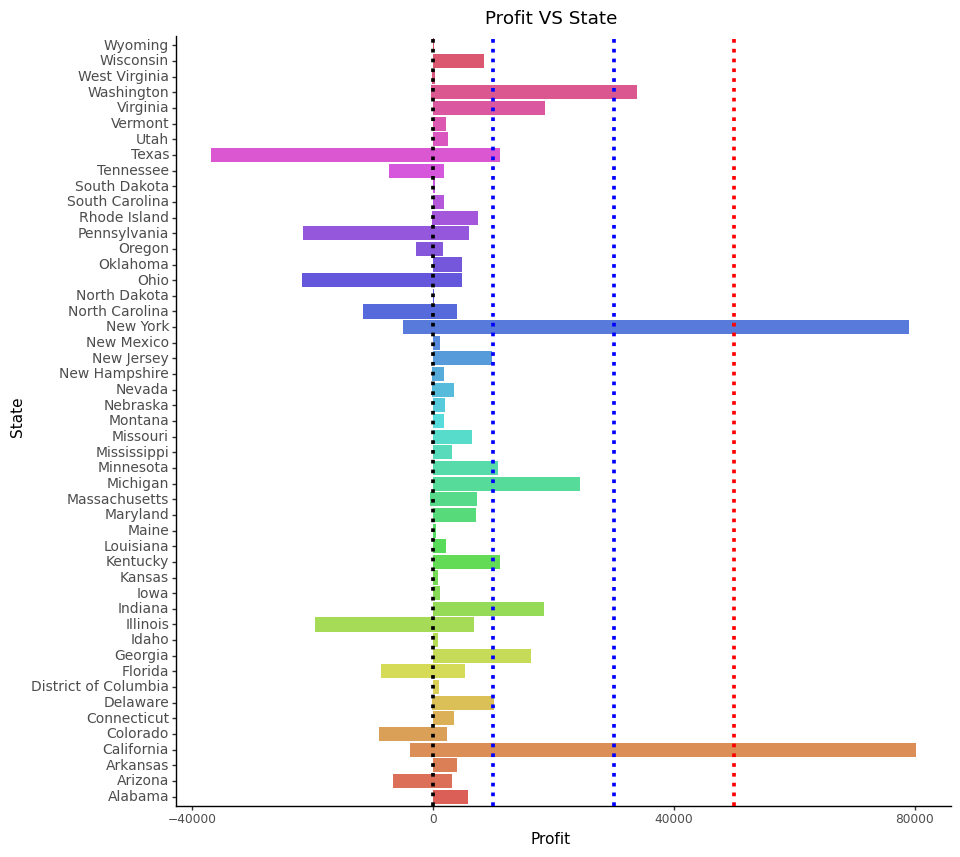

<ggplot: (172589548870)>

In [12]:
Profit_State = (ggplot(sample, aes(x='State', y='Profit', fill='State')) + geom_col() + coord_flip() + theme_classic()
                 + ggtitle('Profit VS State') + scale_fill_discrete(guide = False)
               + geom_hline(yintercept = 0, linetype="dotted", color = "black", size=1.5)
                + geom_hline(yintercept = 30000, linetype="dotted", color = "blue", size=1.5)
                + geom_hline(yintercept = 10000, linetype="dotted", color = "blue", size=1.5)
               + geom_hline(yintercept = 50000, linetype="dotted", color = "red", size=1.5)
               + theme(axis_text_y = element_text(size=10), figure_size=(10,10)))
display(Profit_State)


### Observation from profit analysis based on states:
* Top four heighest profit yielding states
        1. Vermont
        2. Rhode Island
        3. Indiana
        4. Montana
* Least profit yielding states
        1. Ohio
        2. Colorado
        3. North Carolina
        4. Tennessee
        

### PROFIT YIELDED IN EACH SHIP MODE

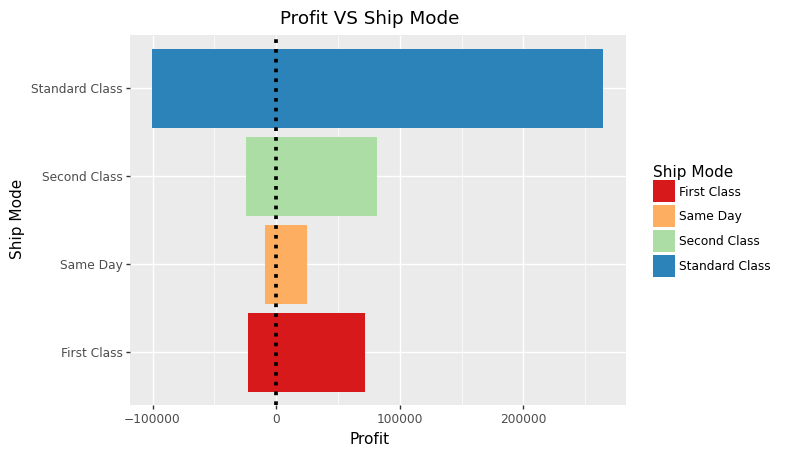

<ggplot: (172587619051)>

In [13]:
Profit_Shipmode = (ggplot(sample, aes(x='Ship Mode', y='Profit', fill='Ship Mode')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral")  + ggtitle('Profit VS Ship Mode')
+ geom_hline(yintercept = 0, linetype="dotted", color = "black", size=1.5))
display(Profit_Shipmode)

### Observation from profit analysis based on Ship Mode:
* Profit is heighest in Standard Class.
* Profit is too low in Same Day.


### PROFIT YIELDED IN EACH SEGMENT

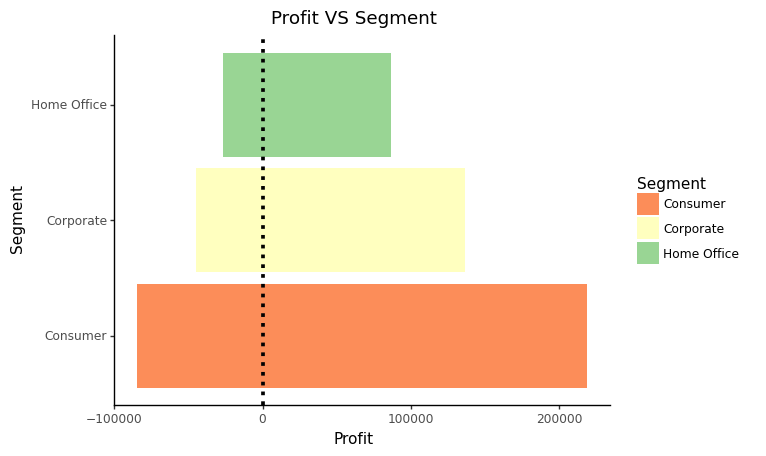

<ggplot: (172589861072)>

In [14]:
Profit_Segment = (ggplot(sample, aes(x='Segment', y='Profit', fill='Segment')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Profit VS Segment')+
geom_hline(yintercept = 0, linetype="dotted", color = "black", size=1.5))
display(Profit_Segment)

### Observation from profit analysis based on Segment:
* Profit is heighest in Consumer segment.
* Profit is too low in Home Office segment.

### PROFIT YIELDED IN EACH REGION

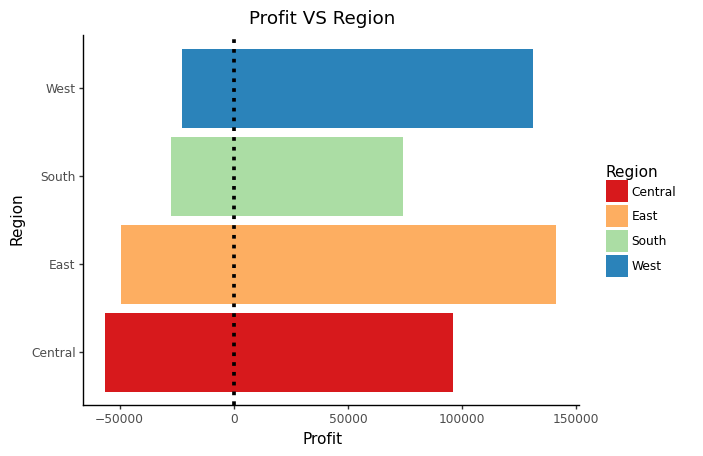

<ggplot: (172590425808)>

In [15]:
Profit_Region = (ggplot(sample, aes(x='Region', y='Profit', fill='Region')) + geom_col() + coord_flip() 
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Profit VS Region')
+ geom_hline(yintercept = 0, linetype="dotted", color = "black", size=1.5))
display(Profit_Region)

### Observation from profit analysis based on Region:
* Profit is heighest in West region.
* Profit is too low in Central region.

### PROFIT YIELDED IN EACH CATEGORY

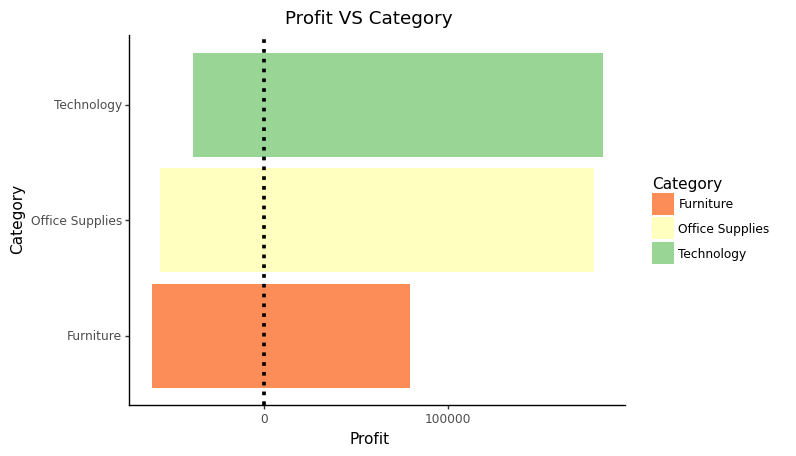

<ggplot: (172587556744)>

In [16]:
Profit_Category = (ggplot(sample, aes(x='Category', y='Profit', fill='Category', label = 'Profit')) + geom_col()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Profit VS Category')+
geom_hline(yintercept = 0, linetype="dotted", color = "black", size=1.5)+ coord_flip() )
display(Profit_Category)

### Observation from profit analysis based on Category:
* Profit is heighest in Technology category.
* Profit is too low in Furniture category.

### PROFIT YIELDED IN EACH SUB CATEGORY 

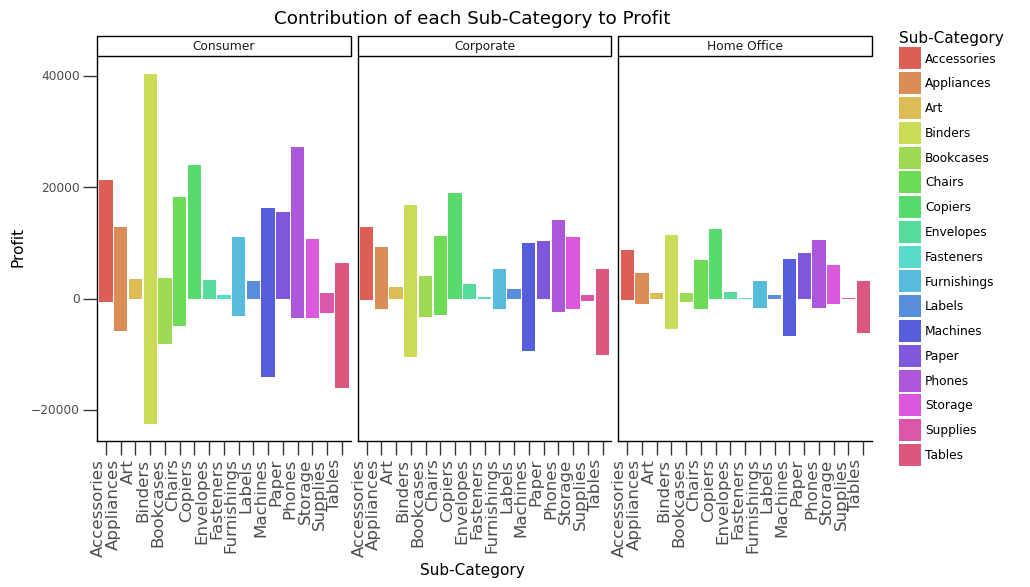

<ggplot: (172587390187)>

In [17]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Sub-Category',y='Profit', fill='Sub-Category')) + theme_classic() +
         geom_col() + facet_wrap(['Segment']) + flip_xlabels + 
         theme(axis_text_x = element_text(size = 12)) + ggtitle("Contribution of each Sub-Category to Profit"))


### Observation from profit analysis based on Sub - Category:
* Lowest profit yielding Sub-Categoriess:
        1. Tables
        2. Bookcases
        3. Supplies
        4. Fasteners
        5. Art
* Heighest profit yielding Sub-Categories:
        1. Copiers
        2. Accessories
        3. Phones
        4. Chairs
        5. Appliances
        

### Observation from discount analysis on each Sub- Category

## WORST AND BEST PROFIT YIELDING SECTIONS

In [18]:
def products(states,X):
    product_df = sample.groupby(X)
    for data in data_arr:
        df = product_df.get_group(data).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (20,5))
        fig.suptitle(data, fontsize=14)        
        ax_index = 0
        for category in ['Furniture', 'Office Supplies', 'Technology']:
            category_df = df.get_group(category).groupby(['Sub-Category']).sum()
            sns.barplot(x = category_df.Profit, y =  category_df.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(category)
            ax_index +=1
        fig.show()

### HEIGHEST AND LOWEST PROFIT YIELDING SEGMENT

In [19]:
sample_segment= sample.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
sample_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


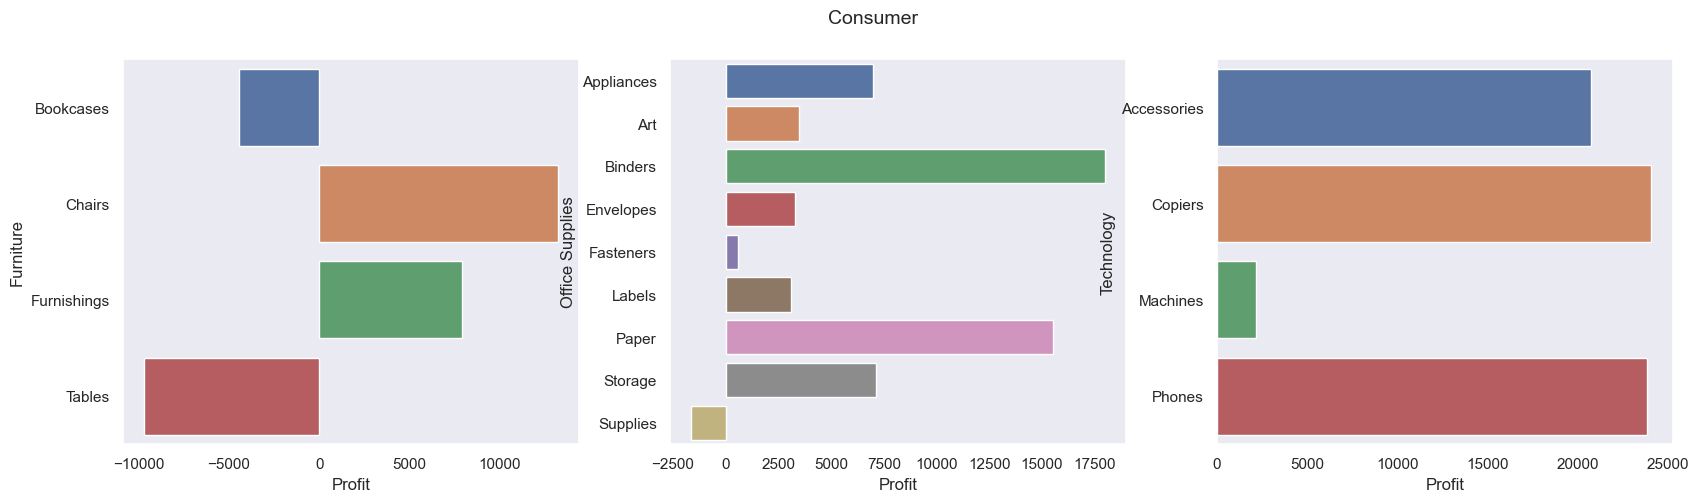

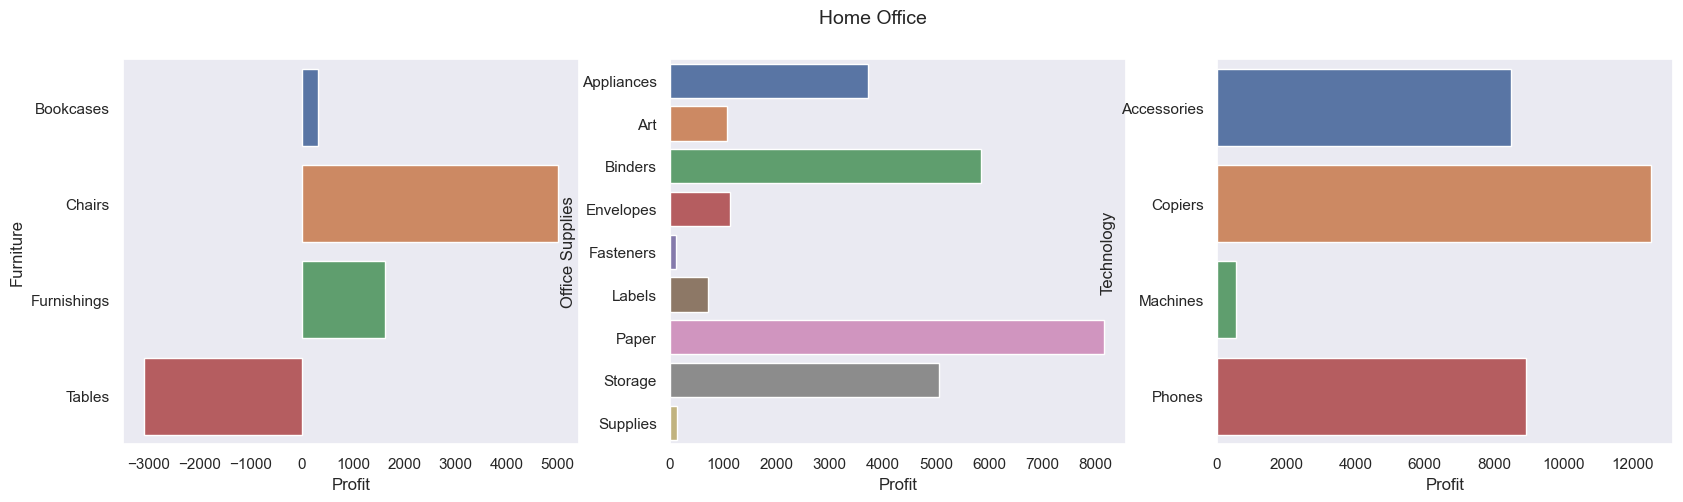

In [20]:
data_arr = ['Consumer','Home Office']
X = ['Segment']
products(data_arr,X)

### Observation from profit analysis based on Sub - Category:
* Loss incured in Tables, Bookcases and supplies is making the Customer segment to yield lowest profit.

### HEIGHEST AND LOWEST PROFIT YIELDING REGION

In [21]:
sample_region = sample.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
sample_region

,Sales,Discount,Profit
Region,,,
Central,215.772661,0.240353,17.092709
East,238.336110,0.145365,32.135808
South,241.803645,0.147253,28.857673
West,226.493233,0.109335,33.849032


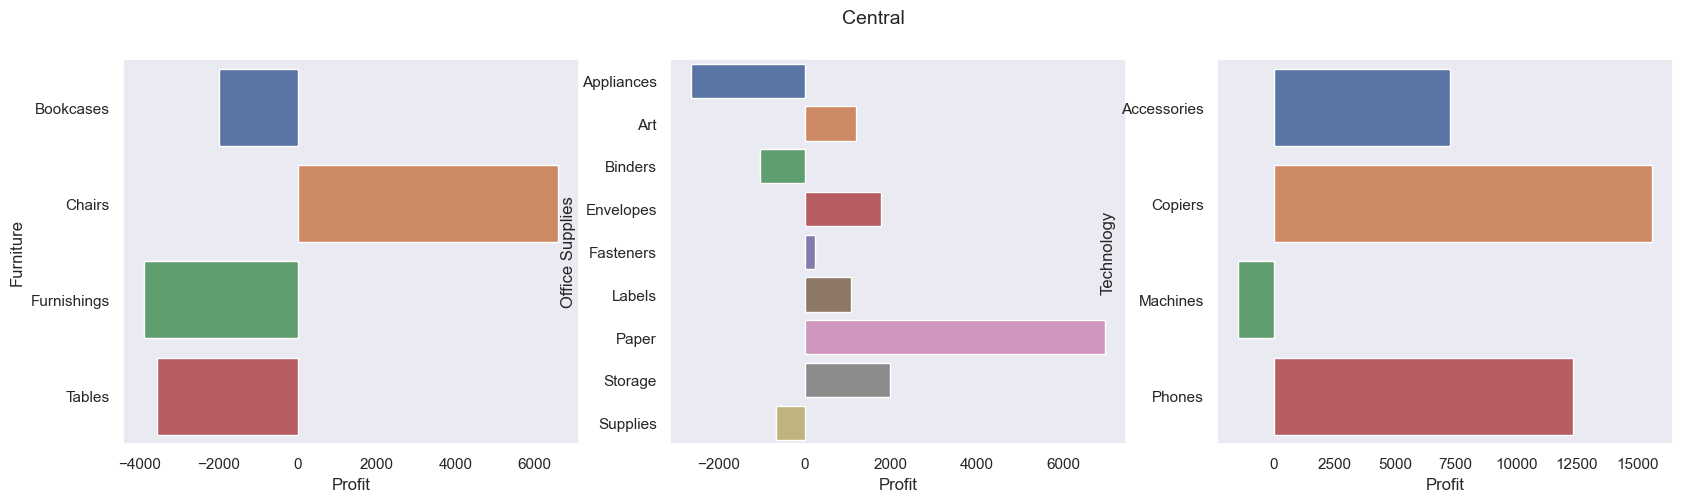

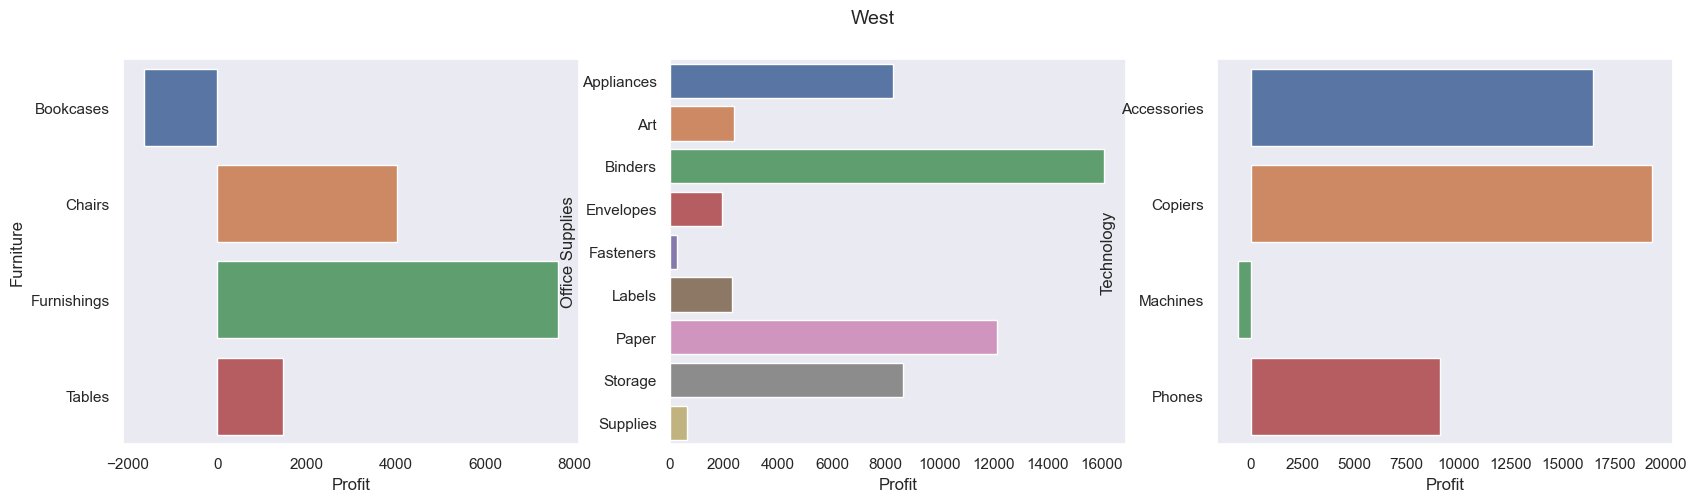

In [22]:
data_arr = ['Central','West']
X = ['Region']
products(data_arr,X)

### Observation from profit analysis based on Sub - Category:
* Loss incured in Furnishings, Tables, Bookcases, Appliances, Blinders, Machines and supplies is making the Central Region to yield lowest profit.

### HEIGHEST AND LOWEST PROFIT YIELDING STATE

In [23]:
sample_state = sample.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
sample_state = sample_state.sort_values('Profit')
sample_state.head(10)

,Sales,Discount,Profit
State,,,
Ohio,166.861697,0.324947,-36.186304
Colorado,176.418231,0.316484,-35.867351
North Carolina,223.305880,0.283534,-30.083985
Tennessee,167.551219,0.291257,-29.189583
Pennsylvania,198.487077,0.328620,-26.507598
Texas,172.779742,0.370193,-26.121174
Illinois,162.939230,0.390041,-25.625787
Arizona,157.508933,0.303571,-15.303235
Oregon,140.573790,0.288710,-9.600569


In [24]:
sample_state.tail(5)

,Sales,Discount,Profit
State,,,
Minnesota,335.541011,0.000000,121.608847
Montana,372.623467,0.066667,122.221900
Indiana,359.431946,0.000000,123.375411
Rhode Island,404.070643,0.021429,130.100523
Vermont,811.760909,0.000000,204.088936


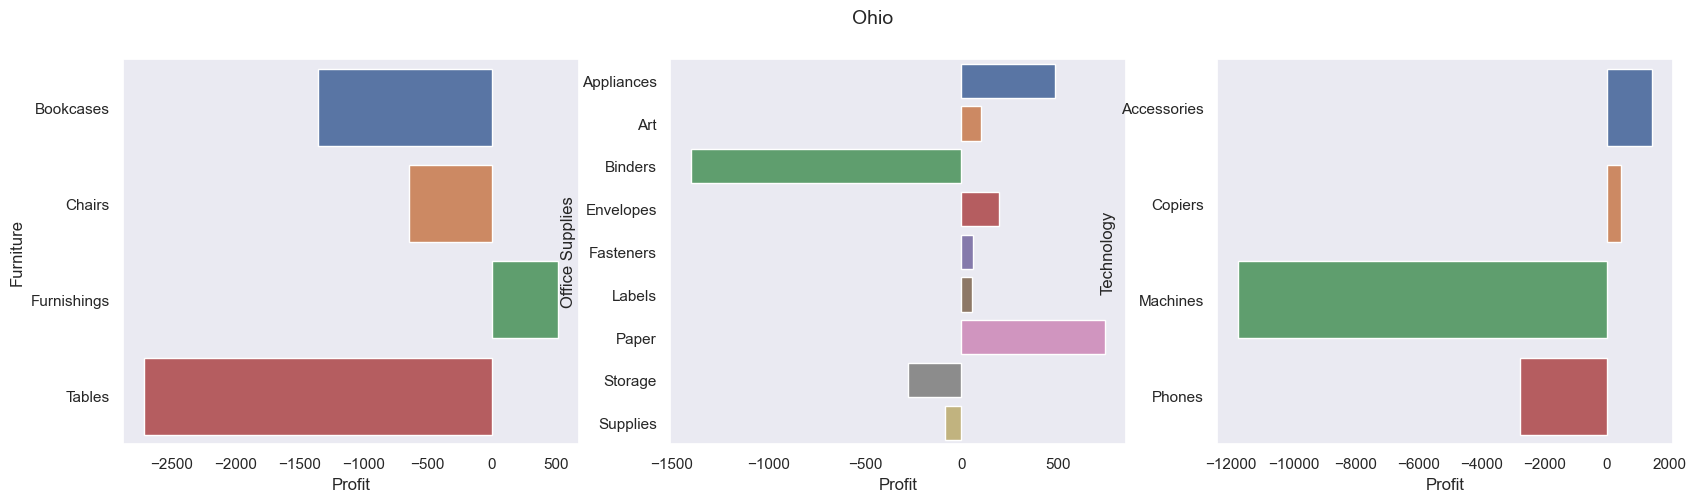

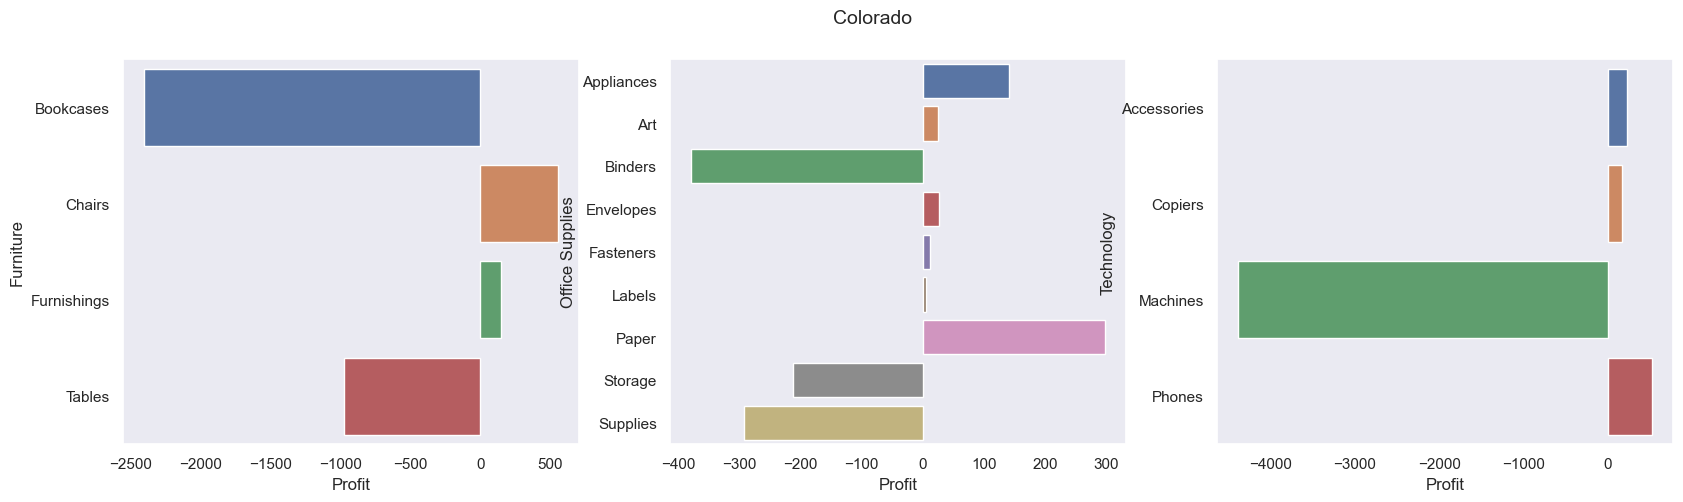

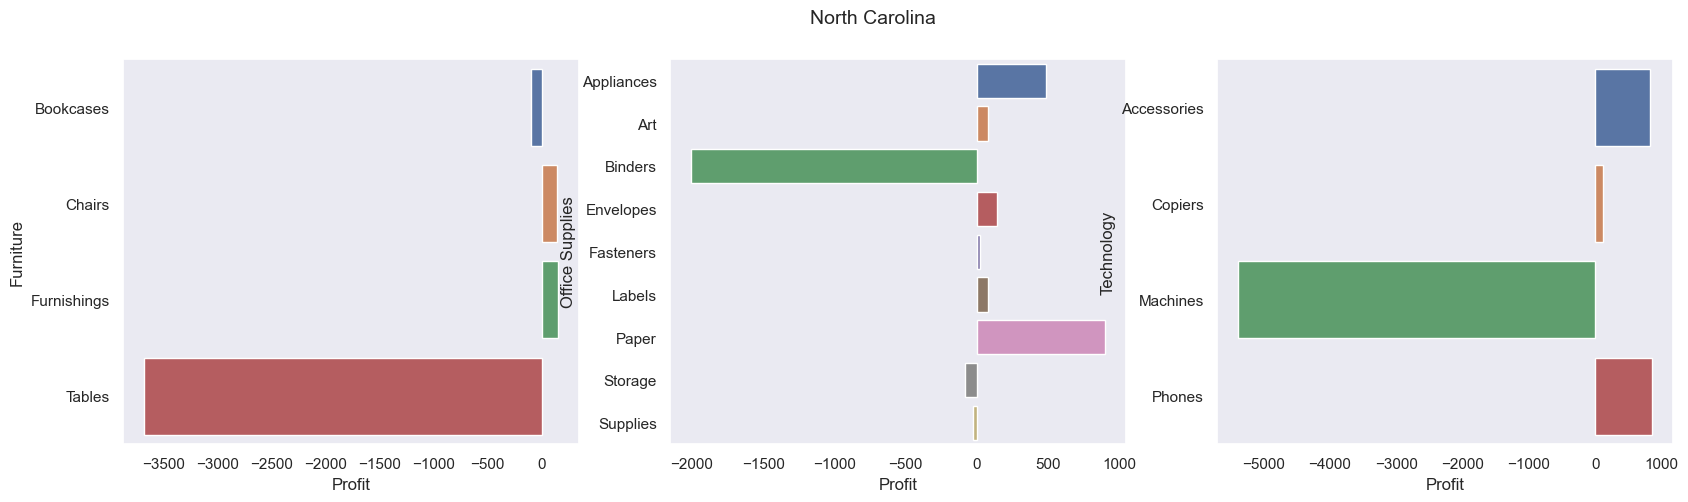

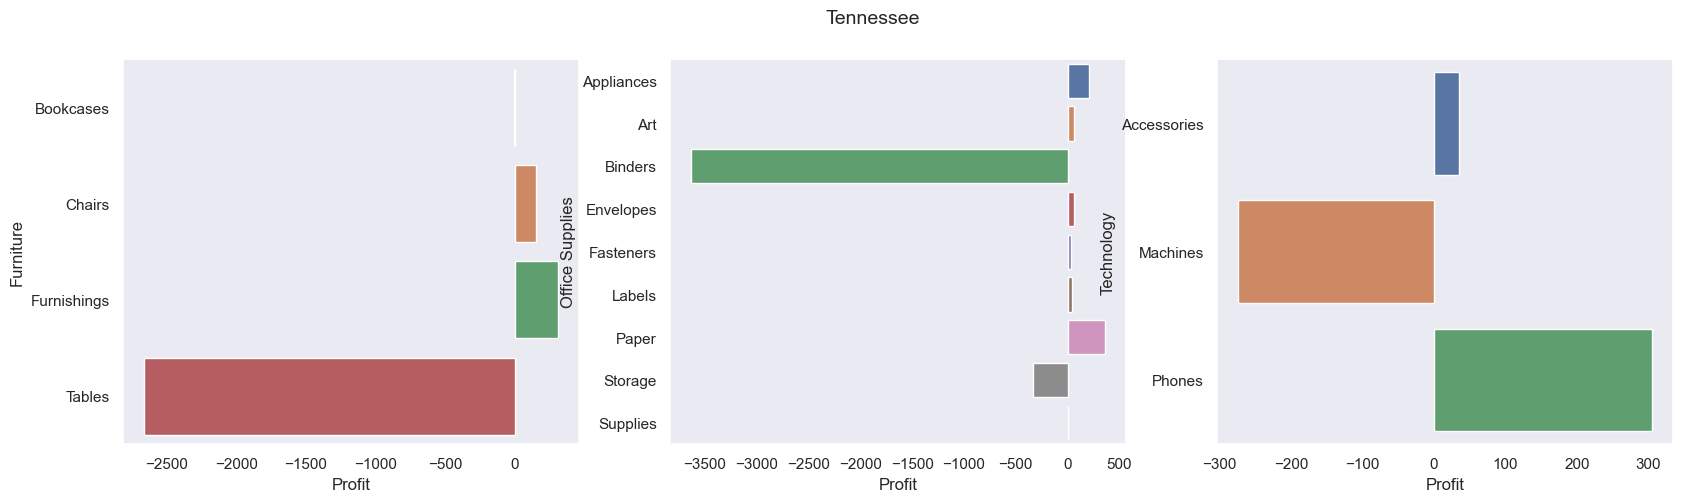

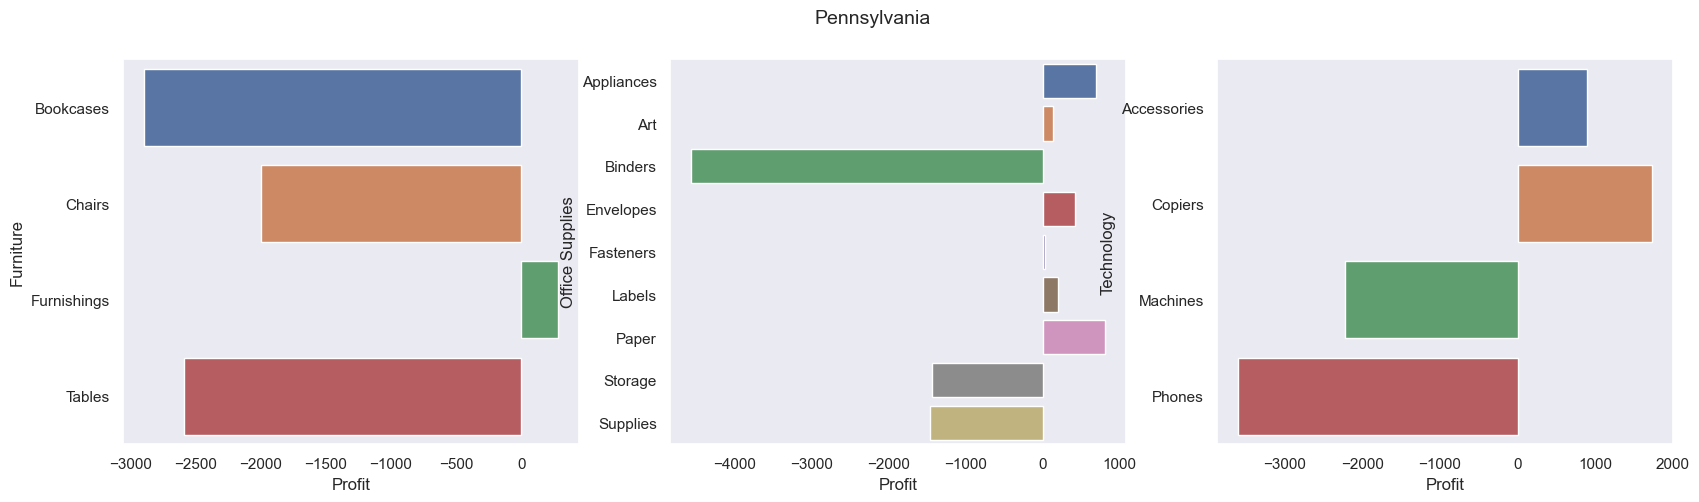

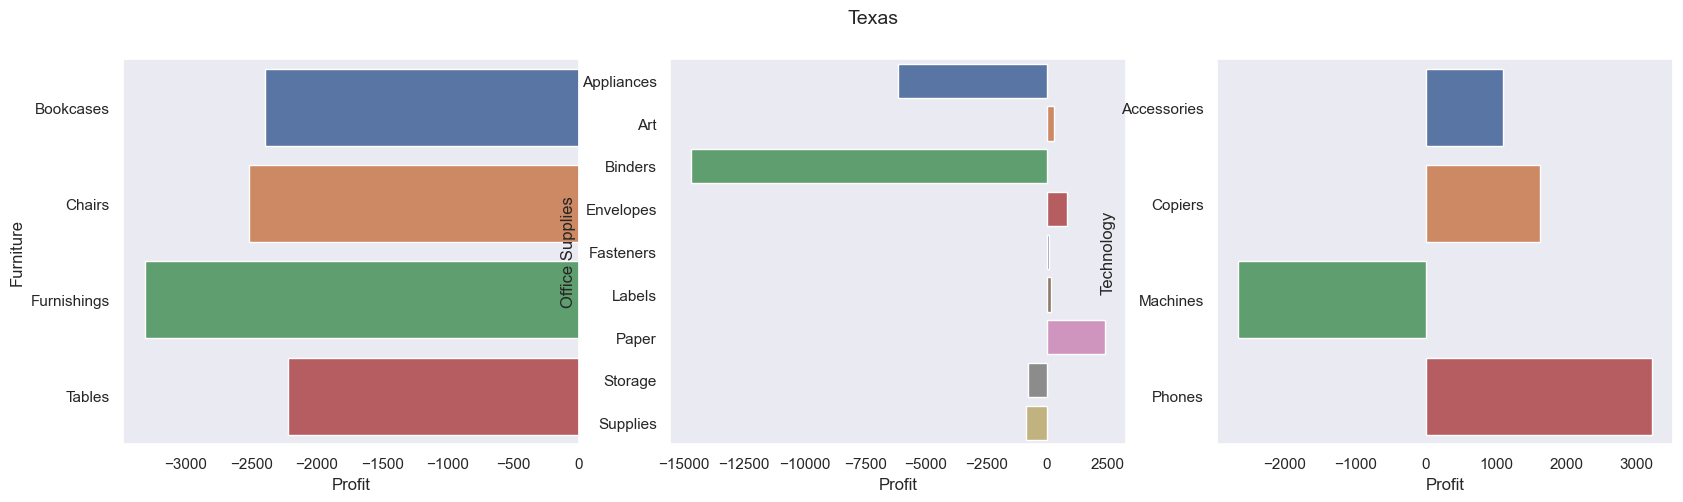

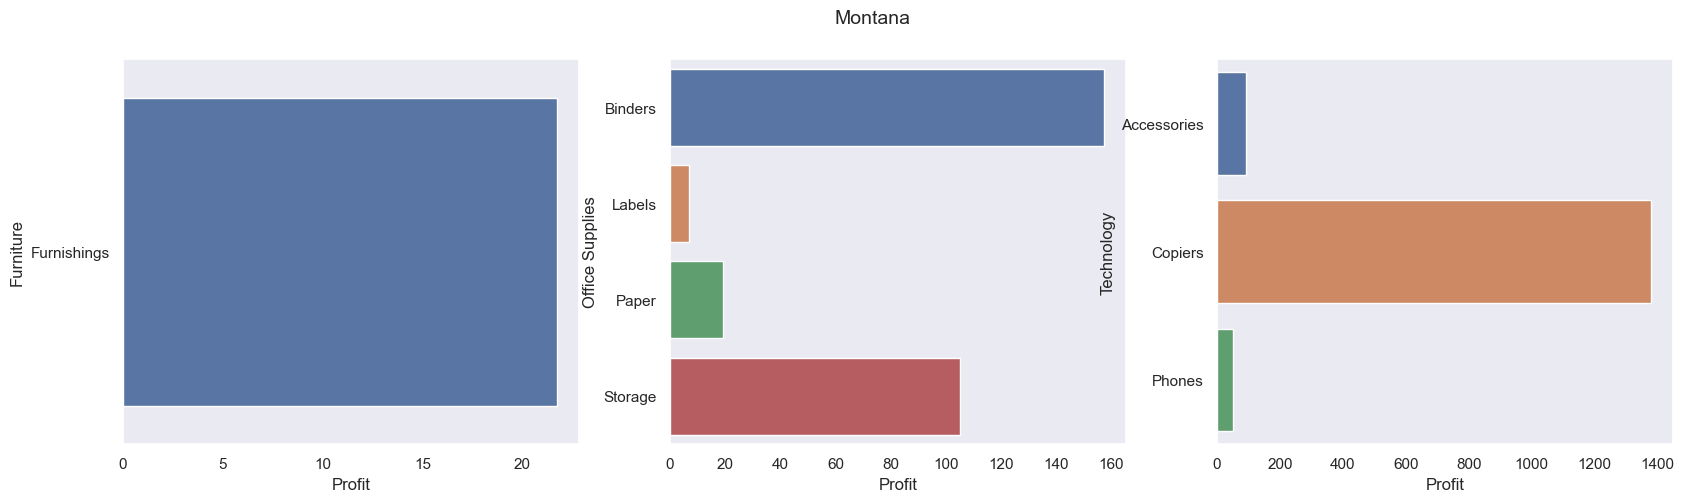

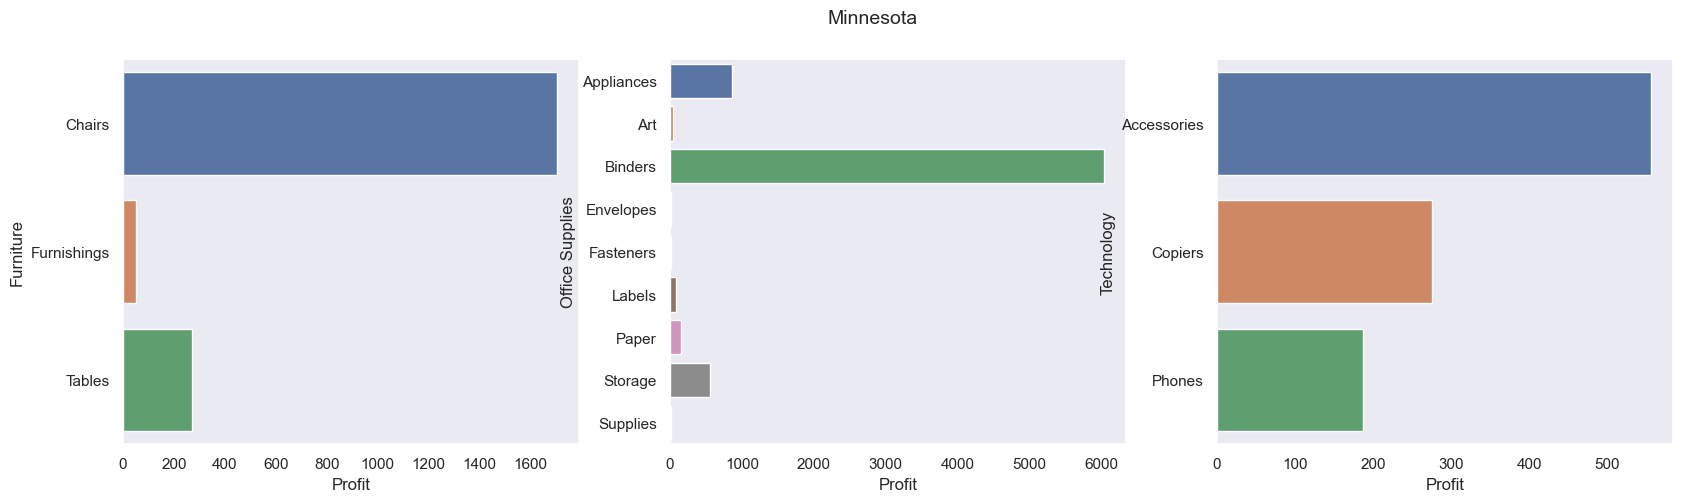

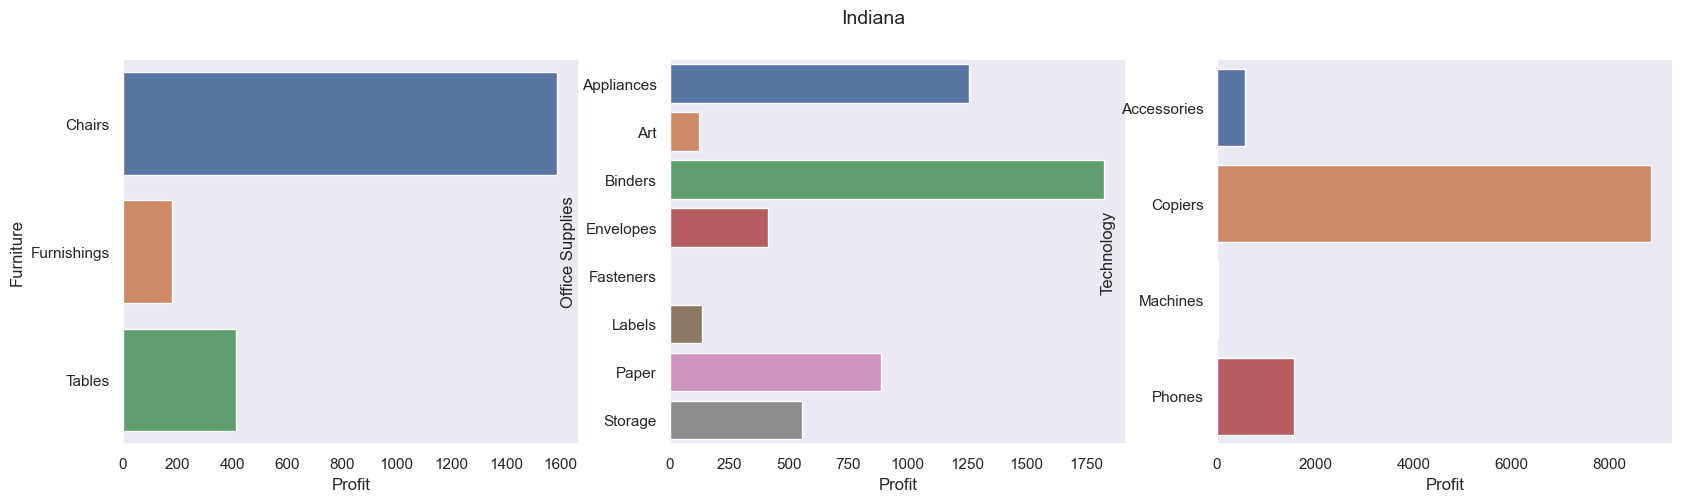

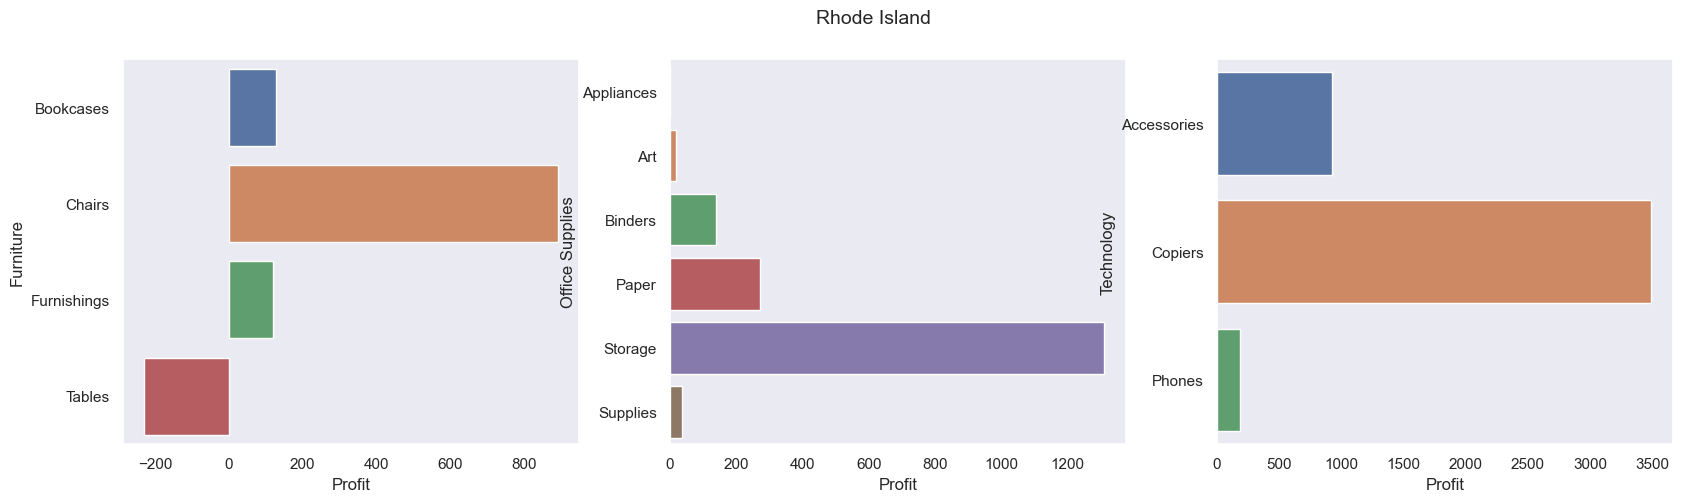

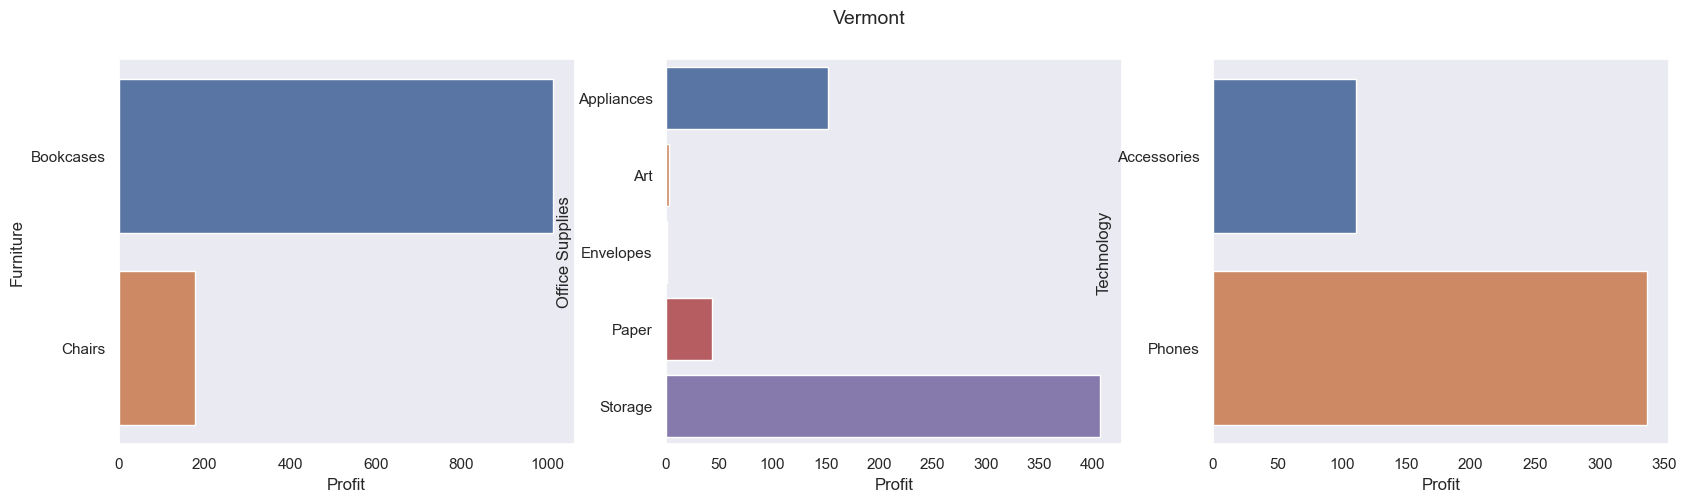

In [25]:
data_arr = ['Ohio','Colorado','North Carolina','Tennessee','Pennsylvania','Texas','Montana','Minnesota','Indiana','Rhode Island','Vermont']
X = ['State']
products(data_arr,X)

### Observation from profit analysis based on Sub - Category:
* Loss incured in Tables, Bookcases, Chairs, Binders,Storage, Machines, Phones and supplies is making the Ohio, Colorado, North Carolina, Tennessee States to yield lowest profit.
* Notably, in state Texas all the products of Sub-Category Furniture and blinders are incuring huge loss.

## **DISCOUNT ANAYSIS ON EACH SUB-CATEGORY**

In [26]:
sample_subc= sample.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()
sample_subc = sample_subc.sort_values('Discount')
sample_subc.head(5)

,Sales,Discount,Profit
Sub-Category,,,
Labels,34.303055,0.068681,15.236962
Storage,264.590553,0.074704,25.152277
Art,34.068834,0.074874,8.200737
Paper,57.284092,0.074891,24.856620
Supplies,245.650200,0.076842,-6.258418


In [27]:
sample_subc.tail(5)

,Sales,Discount,Profit
Sub-Category,,,
Chairs,532.332420,0.170178,43.095894
Bookcases,503.859633,0.211140,-15.230509
Tables,648.794771,0.261285,-55.565771
Machines,1645.553313,0.306087,29.432669
Binders,133.560560,0.372292,19.843574


### Observation from Discount analysis based on Sub - Category:
* Heigheset discounts given in Binders, Machines, Tables, Bookcases and Chairs tends to reduce the profit in least profit yielded states.




---


# **OVERALL SUGGESTIONS TO IMPROVE THE BUSINESS:**


---



###        * Even if Discounts are necessary, too much of discount on a particular product makes profit to decrease tremendously.
###        * Discounts should be given in such a way that both the customers and company will be profited.
###        * Also, we see that a product yielding huge profit in a place is incurring huge loss in another place. Discount plans should be given accordingly.